# The Complexity of Life Mimicked
3d printing of fractals

distinct fractals surfaces

6 fractal plates form a landscape plate 16x24x6 inch *

# Fractal Generation
create 3d fractals

# Fractal to Fractal Plate

# STL from fractal

In [1]:
def zero_out(vectors):
    min_x, min_y, min_z = vectors[0][0]
    for vector in vectors:
        for point in vector:
            if min_x > point[0]:
                min_x = point[0]
            if min_y > point[1]:
                min_y = point[1]
            if min_z > point[2]:
                min_z = point[2]
    for vector in vectors:
        for point in vector:
            point -= numpy.array([min_x, min_y, min_z])
    return vectors

def to_stl(vertexs, file_name):
    data = numpy.zeros(len(vertexs), dtype=mesh.Mesh.dtype)
    data['vectors'] = vertexs
    my_mesh = mesh.Mesh(data)
    my_mesh.save(file_name + '.stl')

# Visualize
pass to blender

# Fractal 1 - Octahedron flakes
A spiky surface of infinitely paurus pyrameids 

### Small Pyramid complete

In [2]:
from stl import mesh
import math
import numpy


vectors = numpy.array([
[
    [1, 1, 0],
    [1, -1, 0],
    [0, 0, 1]
],                         
[
    [1, -1, 0],
    [-1, -1, 0],
    [0, 0, 1]
],                               
                 [
    [-1, -1, 0],
    [-1, 1, 0],
    [0, 0, 1]
],          
[
    [-1, 1, 0],
    [1, 1, 0],
    [0, 0, 1]
],                                    
    
[
    [-1, 1, 0],
    [1, 1, 0],
    [1, -1, 0],
],   
[
    [-1, 1, 0],
    [1, -1, 0],
    [-1, -1, 0]
],   
])

spike_x = 2
spike_y = 2
distribution = 2
num_spikes = spike_x * spike_y
spikes = vectors.copy()
for x in range(spike_x):
    for y in range(spike_y):
        if x == 0 and y == 0:
            continue
        spike = vectors.copy()
        for vertex in spike:
            for point in vertex:
                point[0] += x * distribution
                point[1] += y * distribution
        spikes = numpy.concatenate([spikes, spike])

top_spike = vectors.copy()
for vertex in top_spike:
    for point in vertex:
        point[0] += 0.5 * distribution
        point[1] += 0.5* distribution
        point[2] += 1
spikes = numpy.concatenate([spikes, top_spike])
        
to_stl(spikes, 'spiky_surface')

NameError: name 'my_mesh' is not defined

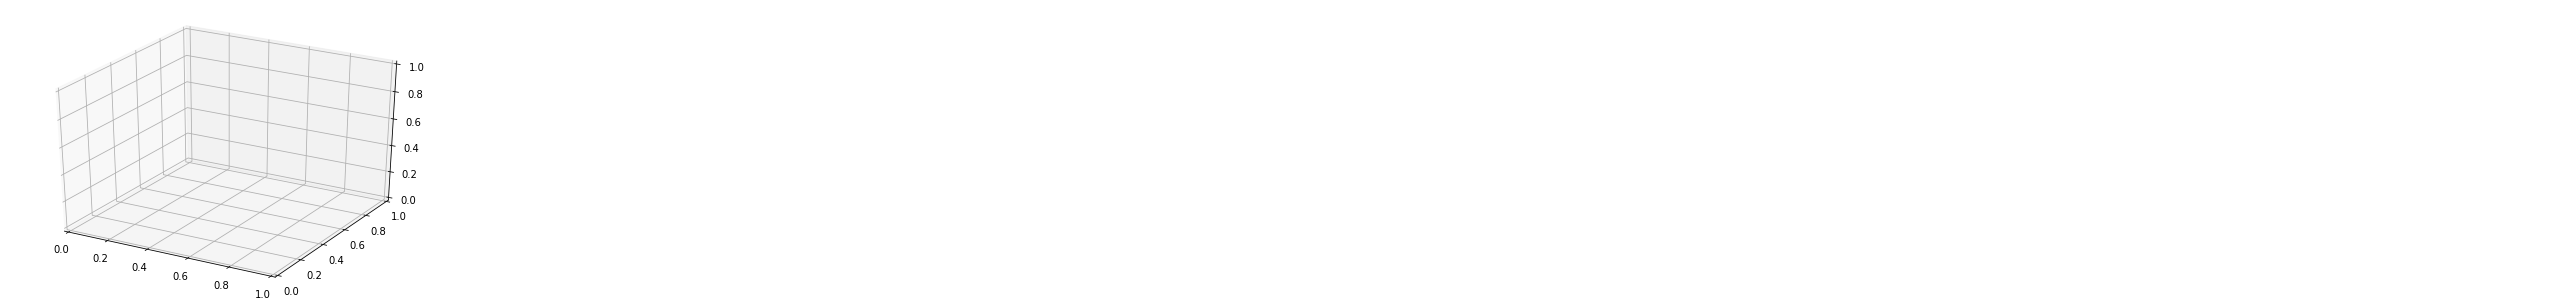

In [3]:
from matplotlib import pyplot
from mpl_toolkits import mplot3d

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)


# Render the cube faces
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(my_mesh.vectors))

# Auto scale to the mesh size
scale = numpy.concatenate(my_mesh).flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

### Big Pyramid

In [4]:
spikes_copy = spikes.copy()
len(spikes_copy)

30

In [14]:
def recursice_extend(starter, starter_scale, max_scale):
    scale = starter_scale
    vertexes = starter.copy()
    
    translations = numpy.array([
        [1,1,-1],
        [1,-1,-1],
        [-1, 1,-1],
        [-1,-1,-1]
    ]
    )
    
    while scale <= max_scale:
        print(scale, len(vertexes))
        # copy prev pyramid four times translated down and to each corner
        # add all pyramids together 
        seed = vertexes.copy()
        for translation in translations:
            duplicate = seed.copy()
            duplicate += translation * scale
            vertexes = numpy.concatenate([vertexes, duplicate])
        inverted_copy = seed.copy()
        min_z = 0
        for vertex in seed:
            for point in vertex:
                if point[2] < min_z:
                    min_z = point[2]
        
        for vertex in inverted_copy:
            for point in vertex:
                point[2] = -point[2]+2*min_z
        vertexes = numpy.concatenate([vertexes, inverted_copy])
        
        scale = scale * 2
    
    return vertexes

SCALE = 4
big_pyramid = recursice_extend(spikes_copy, 2, SCALE)

2 30
4 180


In [15]:
to_stl(big_pyramid, 'big_pyramid')

NameError: name 'my_mesh' is not defined

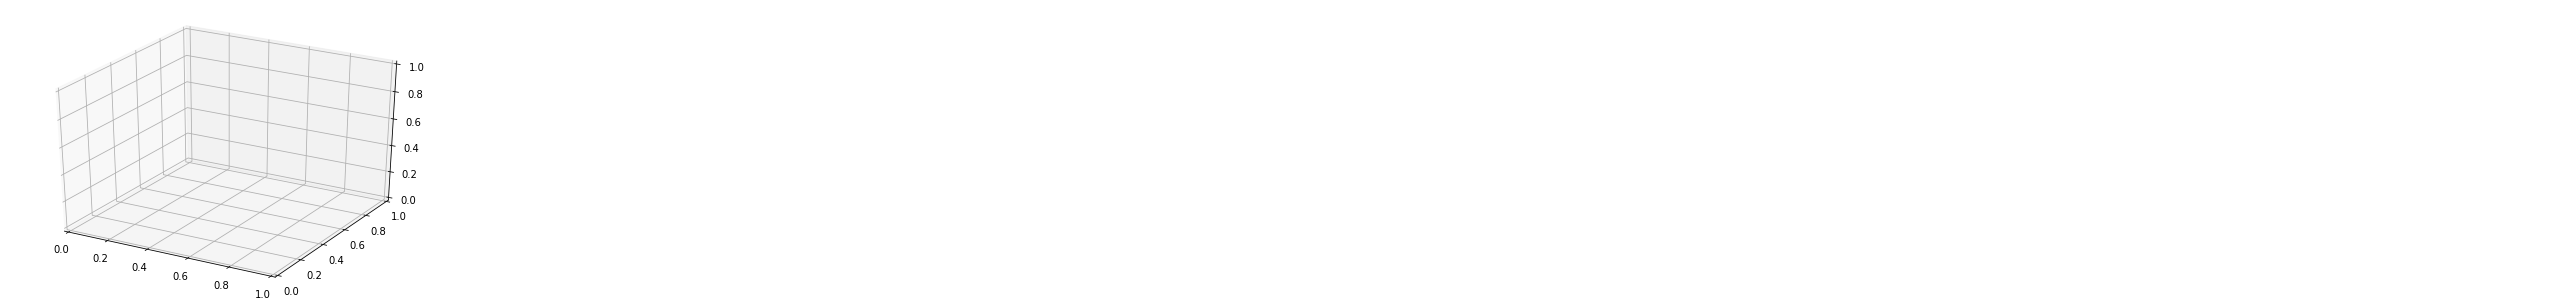

In [16]:
from matplotlib import pyplot
from mpl_toolkits import mplot3d



# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)


# Render the cube faces
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(my_mesh.vectors))

# Auto scale to the mesh size
scale = numpy.concatenate(my_mesh).flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()



### Complete Octahedron Flake Surface

In [17]:
pyramid_copy = big_pyramid.copy()
pyramid_copy = zero_out(pyramid_copy)

to_stl(pyramid_copy, 'big_pyramid_zerod')

In [18]:
x_, y_ = 20, 20
surface = pyramid_copy.copy()
for x in range(x_):
    for y in range(y_):
        element = pyramid_copy.copy()
        offset = numpy.array([x*4*SCALE, y*4*SCALE, 0])
        for vertex in element:
            for point in vertex:
                point += offset
        surface = numpy.concatenate([surface, element])

to_stl(surface, 'fractal_plate_1')        